In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import requests
from bs4 import BeautifulSoup
%matplotlib inline

from timeit import Timer
from pymongo import MongoClient
import multiprocessing
import threading



In [2]:
lines = []
with open('data/favoritesdata.txt') as f:
    for i in range(20):
        line = f.readline()
        lines.append(line)

In [3]:
lines


['Sun Dec 10 12:04:03 2017\n',
 'faveid\tfaver\tfavee\ttype\ttarget\tparent\tdatestamp\n',
 '1\t1\t23470\t1\t51485\t0\tMay  9 2006 10:40:43:467AM\n',
 '2\t1\t33211\t1\t51466\t0\tMay  9 2006 02:08:53:390PM\n',
 '3\t1\t19832\t5\t11837\t0\tMay  9 2006 02:12:52:670PM\n',
 '4\t1\t13877\t1\t51497\t0\tMay  9 2006 04:09:00:170PM\n',
 '9\t1\t2975\t1\t51494\t0\tMay  9 2006 08:58:22:670PM\n',
 '12\t1\t30348\t3\t37730\t0\tMay 10 2006 09:00:50:297AM\n',
 '15\t16206\t22248\t3\t37934\t0\tMay 10 2006 09:17:58:123AM\n',
 '20\t4354\t25359\t5\t11841\t0\tMay 10 2006 09:32:32:827AM\n',
 '26\t28744\t22248\t3\t37934\t0\tMay 10 2006 09:41:36:890AM\n',
 '27\t28744\t29560\t3\t37916\t0\tMay 10 2006 09:42:29:030AM\n',
 '28\t28744\t770\t3\t37897\t0\tMay 10 2006 09:42:57:640AM\n',
 '29\t28744\t31997\t3\t37311\t0\tMay 10 2006 09:43:27:357AM\n',
 '32\t1\t22248\t3\t37934\t0\tMay 10 2006 09:43:38:030AM\n',
 '37\t37188\t18771\t3\t17324\t0\tMay 10 2006 09:46:27:750AM\n',
 '41\t14928\t29560\t3\t37916\t0\tMay 10 2006 09:49

In [4]:
df = pd.read_csv('data/favoritesdata.txt',sep='\t', header=1, parse_dates=['datestamp'], skiprows=0, index_col='faveid')

/home/tomas/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:463: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [5]:
df.head()


,faver,favee,type,target,parent,datestamp
faveid,,,,,,
1,1,23470,1,51485,0,May 9 2006 10:40:43:467AM
2,1,33211,1,51466,0,May 9 2006 02:08:53:390PM
3,1,19832,5,11837,0,May 9 2006 02:12:52:670PM
4,1,13877,1,51497,0,May 9 2006 04:09:00:170PM
9,1,2975,1,51494,0,May 9 2006 08:58:22:670PM


In [135]:
# df['date'] = df['datestamp'].apply(lambda x: '.'.join(x.rsplit(':', 1)))

In [136]:
# df['date'] = pd.to_datetime(df['date'], format='%b %d %Y %H:%M:%S.%f%p')


In [137]:
df.head()

,faver,favee,type,target,parent,datestamp,date
faveid,,,,,,,
1,1,23470,1,51485,0,May 9 2006 10:40:43:467AM,2006-05-09 10:40:43.467
2,1,33211,1,51466,0,May 9 2006 02:08:53:390PM,2006-05-09 02:08:53.390
3,1,19832,5,11837,0,May 9 2006 02:12:52:670PM,2006-05-09 02:12:52.670
4,1,13877,1,51497,0,May 9 2006 04:09:00:170PM,2006-05-09 04:09:00.170
9,1,2975,1,51494,0,May 9 2006 08:58:22:670PM,2006-05-09 08:58:22.670


In [6]:
df['datestamp'] = pd.to_datetime(df['datestamp'], format='%b %d %Y %H:%M:%S:%f%p')

In [7]:
df.tail()

,faver,favee,type,target,parent,datestamp
faveid,,,,,,
32439328,164348,175568,2,7258526,171090,2017-12-10 04:20:31.423
32439329,164348,170113,1,171090,0,2017-12-10 04:23:25.860
32439330,49455,244314,4,4571432,316686,2017-12-10 04:23:38.000
32439331,15091,155526,2,7258687,171095,2017-12-10 04:24:01.643
32439332,168863,91529,6,1292350,24638,2017-12-10 04:24:01.737


In [140]:
# dffavcounts = df[['faver','favee']].groupby('faver').count()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4cac4e59e8>]], dtype=object)

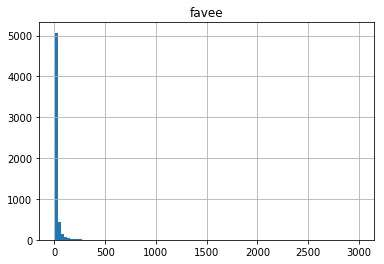

In [141]:
# dffavcounts.hist(bins=100)


In [8]:
df['day'] = df['datestamp'].dt.date

(array([ 732493.,  732616.,  732736.,  732858.,  732981.,  733102.,
         733224.,  733347.,  733467.,  733589.]),
 <a list of 10 Text xticklabel objects>)

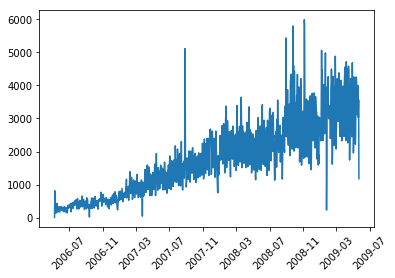

In [167]:
# plt.plot(df[['day','favee']].groupby('day').count(),)
# plt.xticks(rotation=45)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31161689 entries, 1 to 32439332
Data columns (total 7 columns):
faver        int64
favee        int64
type         int64
target       int64
parent       int64
datestamp    datetime64[ns]
day          object
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 1.9+ GB


In [10]:
df2017 = df[df['datestamp'].dt.year == 2017]

In [11]:
df2017.head()

,faver,favee,type,target,parent,datestamp,day
faveid,,,,,,,
27387158,241804,115622,4,4345181,299942,2017-01-01 12:00:29.720,2017-01-01
27387159,1009,12985,2,6860480,164321,2017-01-01 12:00:44.490,2017-01-01
27387160,241804,120957,4,4345187,299942,2017-01-01 12:01:46.517,2017-01-01
27387161,217040,20966,2,6860163,164315,2017-01-01 12:01:58.097,2017-01-01
27387162,179924,100849,4,4406907,304317,2017-01-01 12:02:17.350,2017-01-01


In [12]:
df2017.tail()

,faver,favee,type,target,parent,datestamp,day
faveid,,,,,,,
32439328,164348,175568,2,7258526,171090,2017-12-10 04:20:31.423,2017-12-10
32439329,164348,170113,1,171090,0,2017-12-10 04:23:25.860,2017-12-10
32439330,49455,244314,4,4571432,316686,2017-12-10 04:23:38.000,2017-12-10
32439331,15091,155526,2,7258687,171095,2017-12-10 04:24:01.643,2017-12-10
32439332,168863,91529,6,1292350,24638,2017-12-10 04:24:01.737,2017-12-10


In [16]:
df2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4963715 entries, 27387158 to 32439332
Data columns (total 7 columns):
faver        int64
favee        int64
type         int64
target       int64
parent       int64
datestamp    datetime64[ns]
day          object
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 303.0+ MB


(array([ 736361.,  736420.,  736481.,  736542.,  736603.,  736664.]),
 <a list of 6 Text xticklabel objects>)

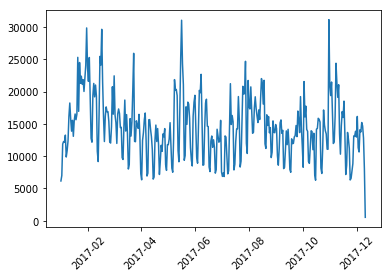

In [17]:
plt.plot(df2017[['day','favee']].groupby('day').count(),)
plt.xticks(rotation=45)

In [13]:
df2017.to_csv("data/favorites2017.csv", sep=',')

In [14]:
df2016 = df[df['datestamp'].dt.year == 2016]
df2016.to_csv("data/favorites2016.csv", sep=',')

In [15]:
df2015 = df[df['datestamp'].dt.year == 2015]
df2015.to_csv("data/favorites2015.csv", sep=',')

In [16]:
df2014 = df[df['datestamp'].dt.year == 2014]
df2014.to_csv("data/favorites2014.csv", sep=',')

In [17]:
df2013 = df[df['datestamp'].dt.year == 2013]
df2013.to_csv("data/favorites2014.csv", sep=',')

In [18]:
del df


In [21]:
df2017['month'] = df2017['datestamp'].dt.month

(array([  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.]),
 <a list of 8 Text xticklabel objects>)

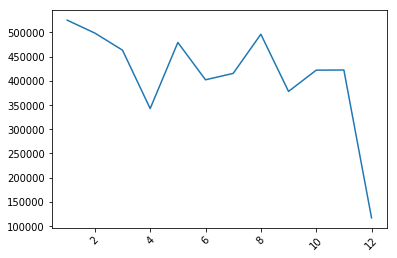

In [24]:
plt.plot(df2017[['month','faver']].groupby('month').count(),)
plt.xticks(rotation=45)

In [25]:
dffavcounts = df2017[['faver','favee']].groupby('faver').count()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff7a2e9e860>]], dtype=object)

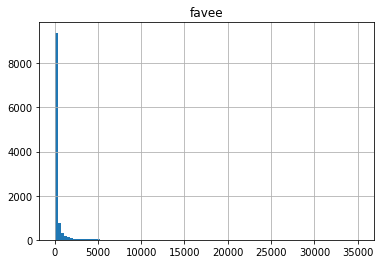

In [26]:
dffavcounts.hist(bins=100)

In [30]:
dffavcounts.describe()

,favee
count,11316.000000
mean,438.645723
std,1820.476322
min,1.000000
25%,5.000000
50%,28.000000
75%,173.000000
max,35133.000000


In [31]:
dffavcounts.head()

,favee
faver,
1,79
40,479
58,352
123,11
138,43


In [33]:
dffctype = df2017[['faver','favee','type']].groupby(['faver','type']).count()

In [46]:
dffctype.unstack().describe()

favee                                                       \
type            1             2            3            4            5    
count  6652.000000   8794.000000  5501.000000  7084.000000  1594.000000   
mean     25.560132    452.701501    15.995092    67.435347     3.104768   
std      88.670069   1892.622251    50.592901   237.289840     5.365926   
min       1.000000      1.000000     1.000000     1.000000     1.000000   
25%       2.000000      4.000000     1.000000     2.000000     1.000000   
50%       5.000000     25.000000     4.000000     9.000000     1.000000   
75%      17.000000    159.000000    13.000000    37.000000     3.000000   
max    2425.000000  33646.000000  1773.000000  5338.000000    98.000000   

                                                                               \
type            6           7           8           9          10          13   
count  3754.000000  342.000000  242.000000  151.000000  22.000000  168.000000   
mean     38.708578    1.488304    2.640496    3.569536   1.045455    1.880952   
std     114.703804    1.287719    4.730813    7.573207   0.213201    2.266152   
min       1.000000    1.000000    1.000000    1.000000   1.000000    1.000000   
25%       2.000000    1.000000    1.000000    1.000000   1.000000    1.000000   
50%       6.000000    1.000000    1.000000    1.000000   1.000000    1.000000   
75%      26.000000    1.000000    2.000000    3.000000   1.000000    2.000000   
max    3015.000000   16.000000   38.000000   73.000000   2.000000   25.000000   

                                                             
type           19          20   22          23           24  
count  149.000000  413.000000  2.0  727.000000  2340.000000  
mean     1.234899    5.125908  1.0    5.110041    37.874359  
std      0.774503   11.981727  0.0   17.729883   120.465782  
min      1.000000    1.000000  1.0    1.000000     1.000000  
25%      1.000000    1.000000  1.0    1.000000     2.000000  
50%      1.000000    2.000000  1.0    1.000000     7.000000  
75%      1.000000    4.000000  1.0    3.000000    28.000000  
max      7.000000  124.000000  1.0  295.000000  2346.000000

Types:

    1 & 2 - Metafilter post & comment
    3 & 4 - Ask Metafilter post & comment
    5 & 6 - MetaTalk post & comment
    7 - Projects post
    8 - Music post
    9 - Music comment - if the parent is 0, this is broken.
    10 - Jobs post
    11 & 12 - Travel post & comment
    13 - Projects comment

For post-type favorites, "target" is the link_id of the post being favorited.

For comment-type favorites, "target" is the comment_id of the comment being favorited, and "parent" is the link_id of the thread in which the comment resides.

Note that the case of a fave of type 9, a Music comment, with a parent of 0, is the result of a sporadic bug introduced at the launch of Music on June 29th, 2006 and present until October 21st, 2006. There are approximately 30 degenerate favorites of this sort in the database, and they may be either repaired or removed in the future.

Favorites that have been removed by the favoriting user are deleted from the database; accordingly, the faveid values present in this file are not strictly sequential. 

http://mefiwiki.com/wiki/Infodump

In [48]:
import seaborn as sns


/home/tomas/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:598: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/home/tomas/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:826: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


(0, 1000)

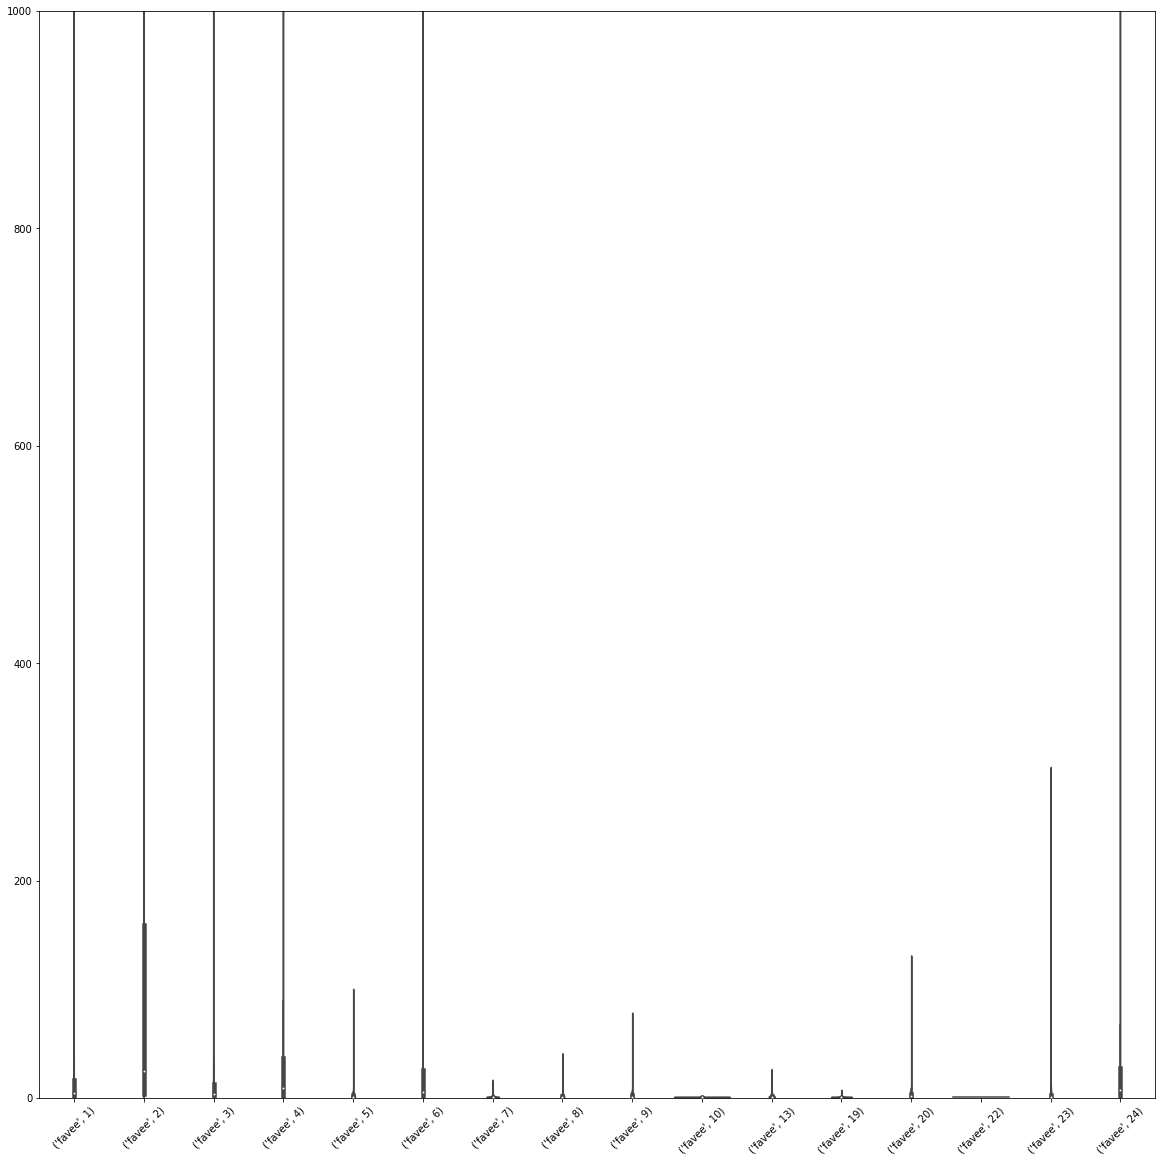

In [58]:
plt.figure(figsize=(20,20))
ax = sns.violinplot(data=dffctype.unstack())

plt.xticks(rotation=45)
plt.ylim(0,1000)

In [6]:
dfposts = pd.read_csv('data/postdata_mefi.txt',sep='\t', header=1, parse_dates=['datestamp'], skiprows=0, index_col='postid')

/home/tomas/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
dfposts.head()

,userid,datestamp,category,comments,favorites,deleted,reason
postid,,,,,,,
19,1.0,Jul 14 1999 03:03:04:930PM,0.0,116.0,142.0,0.0,[NULL]
25,1.0,Jul 15 1999 09:37:51:770AM,0.0,6.0,1.0,0.0,[NULL]
26,16.0,Jul 15 1999 09:54:26:280AM,0.0,4.0,1.0,0.0,[NULL]
27,16.0,Jul 15 1999 09:57:54:160AM,0.0,1.0,0.0,0.0,[NULL]
33,1.0,Jul 15 1999 11:18:45:247AM,0.0,0.0,2.0,0.0,[NULL]


In [9]:
dfposts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 170246 entries, 19 to 171097
Data columns (total 7 columns):
userid       170242 non-null float64
datestamp    170246 non-null object
category     170242 non-null float64
comments     170242 non-null float64
favorites    170242 non-null float64
deleted      170242 non-null float64
reason       170242 non-null object
dtypes: float64(5), object(2)
memory usage: 10.4+ MB


In [69]:
dfcom = pd.read_csv('data/commentdata_mefi.txt',sep='\t', header=1, parse_dates=['datestamp'], skiprows=0, index_col='postid')

/home/tomas/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:463: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [65]:
dfcom.head()

,commentid,userid,datestamp,faves,best answer?
postid,,,,,
24,2,1,Jul 15 1999 01:21:06:213AM,0,0
26,5,1,Jul 15 1999 10:00:12:850AM,2,0
25,6,16,Jul 15 1999 10:04:48:563AM,2,0
26,7,16,Jul 15 1999 10:54:36:160AM,2,0
34,8,1,Jul 15 1999 12:04:04:867PM,1,0


In [67]:
dfcom[dfcom.index==26]

,commentid,userid,datestamp,faves,best answer?
postid,,,,,
26,5,1,Jul 15 1999 10:00:12:850AM,2,0
26,7,16,Jul 15 1999 10:54:36:160AM,2,0


In [70]:
dfuser = pd.read_csv('data/usernames.txt',sep='\t', header=1, parse_dates=['joindate'], skiprows=0, index_col='userid')

In [71]:
dfuser.head()

,joindate,name
userid,,
1,Jan 27 2000 08:16:57:367PM,mathowie
8,Jan 27 2000 08:16:57:367PM,OneBallJay
13,Jan 27 2000 08:16:57:367PM,jeffp
16,Jan 27 2000 08:16:57:367PM,jjg
17,Jan 27 2000 08:16:57:367PM,honkzilla


In [76]:
dfuser[dfuser['name']=='Jaclyn']

,joindate,name
userid,,
215374,Dec 25 2014 08:47:31:760PM,Jaclyn


In [77]:
dfuser[dfuser['name']=='tomasbielskis']

,joindate,name
userid,,
267151,Dec 6 2017 11:11:38:753AM,tomasbielskis


In [120]:
def getmfpage(postid):
    """passed a post_id saves the page content for the post as a json file in data/posts"""
    url = 'https://www.metafilter.com/'
    page = requests.get(url+str(postid)).content
#     d = pd.DataFrame(data={postid: [page]})
#     path = 'data/posts/'
#     d.to_json(path+str(d.columns[0]))
    with open(path+str(postid),'wb') as f:
        f.write(page)

In [21]:
d = getmfpage('171194')

In [58]:
d.columns[0]

'33'

In [26]:
path = 'data/posts/'

In [27]:
path+d.columns[0]

'data/posts/171194'

In [29]:
d.to_json(path+d.columns[0])

In [77]:
def scrapemfpages_sequential(n):
    for p in dfposts.index[0:n]:
        if p not in os.listdir('data/posts'):
            getmfpage(p)

In [78]:
scrapemfpages_sequential(14)

In [60]:
os.listdir('data/posts')

['35',
 '44',
 '33',
 '36',
 '43',
 '25',
 '34',
 '19',
 '40',
 '26',
 'param',
 '37',
 '27',
 '39',
 '171194',
 '38']

In [62]:
def scrape_parallel_concurrent(pool_size, post_list):
    pool = multiprocessing.Pool(pool_size)
    pool.map(getmfpage, post_list)
    pool.close()
    pool.join()

In [63]:
scrape_parallel_concurrent(4, [str(p) for p in dfposts.index[0:20]])

In [69]:
t = Timer(lambda: scrapemfpages_sequential(10))
print("Completed sequential in %s seconds." % t.timeit(1))

Completed sequential in 5.568351427995367 seconds.


In [70]:
t = Timer(lambda: scrape_parallel_concurrent(4,[str(p) for p in dfposts.index[0:10]]))
print("Completed using threads in %s seconds." % t.timeit(1))

Completed using threads in 2.0939606730025844 seconds.


In [276]:
from collections import defaultdict
from bs4 import BeautifulSoup
# import bs4

def extract_posts_comments():
    posts = defaultdict(str)
    comments = defaultdict(str)
    commentids = []
    for file in os.listdir(path):
        with open(path+file,"r") as f:
            page = f.read()
        soup = BeautifulSoup(page, 'html.parser')
        commenttext = soup.find_all('div', class_ = 'comments')
        post_text = soup.find('div', attrs={'class': 'copy'})
        psmallcopy = post_text.find('span', class_='smallcopy')
        if psmallcopy:
            psmallcopy.decompose()
        posts[file] = post_text.get_text()
        commenttext
        for t in commenttext:
            commentid = t.previous_sibling
            if type(commentid) is not bs4.element.Tag:
                continue
            csmallcopy = t.find('span', class_='smallcopy')
            if csmallcopy:
                csmallcopy.decompose()
            comments[commentid['name']] = t.text
    return posts, comments


In [277]:
extract_posts_comments()

(defaultdict(str,
             {'167906': "NPR Music's Essential Songs, Albums, Performances And Videos Of 2017 (So Far) isn't going to rank anything. It's just going to explain why. And you'll be glad for it.Rather than attempt to come to a consensus about the best albums or songs from the first six months of the year, we opted to select music that was meaningful to us as individuals, music that washed away all the background noise, songs and albums and performances that made sense to us, whether or not they made sense of the world. Moments like that are blessings, not to be taken for granted.",
              '153472': 'The Wiener Cello Ensemble presents 5+1: Bolero\n',
              '153349': "Let's Play: War The Rand Corporation on wargaming, introduction to wargaming, and the anatomy of a wargame. \n\nThat time the Pentagon used nukes in training. \nA brief history of PLA wargames.\nHow HG Wells popularized the tabletop wargame\nThe DoD's recommittment to wargaming\n\nCan gamers re

In [265]:
print(comments['96737'])

*cracking intercom*

User 2326!  Move back to your assigned thread!  

Move back to your assigned thread!

*static*


In [121]:
scrape_parallel_concurrent(4,[str(p) for p in dfposts.index[0:10]])

In [229]:
pd.DataFrame(data=[posts]).to_json('data/posttext')


In [230]:
posts


defaultdict(str,
            {'19': "Cat-Scan.com is one of the strangest sites I've seen in some time. I have no idea how these people got their cats wedged into their scanners, or why.\n",
             '25': "As if you couldn't get enough of the JenniCam, now there's the JenniShow. It's fairly boring, more like a video diary than a voyeur's dream.\n",
             '26': "The hype machine for Apple's new Consumer Portable appears to be in full swing.\n",
             '27': "The world's smallest Web server keeps getting smaller.\n",
             '33': "EXPN is ESPN/ABC/GoNetworks/DisneyEmpire's newest attempt to exploit the existence of extreme sports. I've spent most of my life skateboarding, but I still don't know how much of it I could watch on TV. I'm sure it would get old after a few weeks.\n",
             '34': "The Death Clock No one knows when they're going to die -- until now! Thanks to the web, you can visit The Death Clock, put in some data about yourself and see what day, 

In [232]:
comments

defaultdict(str,
            {'100014': '19.org: This is the home of monotheists \n\nNope.',
             '100169': "Hey wait a second... today's ice cream day!  I almost forgot!",
             '105463': 'Zippity BOP!',
             '105482': 'Nothing!  You are nothing with this----->™',
             '105487': 'I couldn\'t have said it better myself. \n\n(I stole your "out").',
             '105524': "I'm not sure what frightens me more:  the X8IB plague or the Zippity* plague.  I'll be in my underground bunker if you need me.  With the forcefield on.",
             '105896': 'Is the CliffyB from cat-scan the same CliffyB from UT?\n\nYes he is.',
             '105905': "Great. I didn't think there would be that many people running around with the name CliffyB in public.\n\nNow has CliffyB used any of the Cat Scans as a basis for a map/skin/model etc.\n\nYou know SkwuashedKat.unr or something?",
             '105907': "This old Cat Scan page has reference to both UT and Cat Scan (of cou

In [231]:
from pymongo import MongoClient

DB_NAME = "mefi"
COLLECTION_NAME1 = "posts"
COLLECTION_NAME2 = "comments"

client = MongoClient()
db = client[DB_NAME]
coll1 = db[COLLECTION_NAME1]
coll2 = db[COLLECTION_NAME2]

coll1.insert(posts)
coll2.insert(comments)

/home/tomas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: insert is deprecated. Use insert_one or insert_many instead.
  if sys.path[0] == '':
/home/tomas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DeprecationWarning: insert is deprecated. Use insert_one or insert_many instead.
  del sys.path[0]


ObjectId('5a4e6a4d30a5851b178902c8')

In [243]:
import os
import boto

In [240]:
# scraped = os.system('aws s3 ls s3://tomasbielskis-galvanizebucket/capstone/data/posts/')

In [244]:
conn = boto.connect_s3()

In [248]:
b = conn.get_bucket('tomasbielskis-galvanizebucket')

In [255]:
filenames = [f.name.strip('capstone/data/posts/') for f in b.list(prefix='capstone/data/posts/')]

In [256]:
filenames

['',
 '100',
 '1000',
 '10000',
 '10001',
 '10002',
 '10003',
 '10005',
 '10006',
 '10007',
 '10008',
 '10009',
 '1001',
 '10010',
 '10011',
 '10012',
 '10013',
 '10015',
 '10016',
 '10017',
 '10018',
 '10019',
 '1002',
 '10020',
 '10021',
 '10022',
 '10023',
 '10024',
 '10025',
 '10027',
 '10028',
 '10029',
 '1003',
 '10030',
 '10031',
 '10032',
 '10034',
 '1004',
 '10040',
 '10043',
 '10044',
 '10045',
 '10046',
 '10047',
 '10048',
 '10049',
 '1005',
 '10050',
 '10051',
 '10052',
 '10053',
 '10054',
 '10056',
 '10057',
 '10058',
 '10059',
 '1006',
 '10060',
 '10061',
 '10062',
 '10063',
 '10064',
 '10065',
 '10066',
 '10067',
 '10068',
 '10069',
 '1007',
 '10070',
 '10071',
 '10074',
 '10075',
 '10076',
 '10079',
 '1008',
 '10080',
 '10081',
 '10082',
 '10083',
 '10084',
 '10085',
 '10086',
 '10087',
 '10088',
 '10089',
 '1009',
 '10090',
 '10091',
 '10092',
 '10093',
 '10094',
 '10095',
 '10096',
 '10097',
 '10098',
 '10099',
 '101',
 '1010',
 '10100',
 '10101',
 '10102',
 '10103',


In [258]:
dfposts.index

Index([    19,     25,     26,     27,     33,     34,     35,     36,     37,
           38,
       ...
       171088, 171089, 171090, 171091, 171092, 171093, 171094, 171095, 171096,
       171097],
      dtype='object', name='postid', length=170246)

In [262]:
[x for x in dfposts.index if str(x) not in filenames]

[45987,
 45988,
 45989,
 45990,
 45991,
 45992,
 45993,
 45994,
 45995,
 45996,
 45997,
 45998,
 45999,
 46000,
 46001,
 46002,
 46003,
 46004,
 46005,
 46006,
 46007,
 46008,
 46009,
 46010,
 46011,
 46012,
 46013,
 46014,
 46015,
 46016,
 46017,
 46018,
 46019,
 46020,
 46021,
 46022,
 46023,
 46024,
 46025,
 46026,
 46027,
 46028,
 46029,
 46030,
 46031,
 46032,
 46033,
 46034,
 46035,
 46036,
 46037,
 46038,
 46039,
 46040,
 46041,
 46042,
 46043,
 46044,
 46045,
 46046,
 46047,
 46048,
 46049,
 46050,
 46051,
 46052,
 46053,
 46054,
 46055,
 46056,
 46057,
 46058,
 46059,
 46060,
 46061,
 46062,
 46063,
 46064,
 46065,
 46066,
 46067,
 46068,
 46069,
 46070,
 46071,
 46072,
 46073,
 46074,
 46075,
 46076,
 46077,
 46078,
 46079,
 46080,
 46081,
 46082,
 46083,
 46084,
 46085,
 46086,
 46087,
 46088,
 46089,
 46090,
 46091,
 46092,
 46093,
 46094,
 46095,
 46096,
 46097,
 46098,
 46099,
 46100,
 46101,
 46102,
 46103,
 46104,
 46105,
 46106,
 46107,
 46108,
 46109,
 46110,
 46111,


In [263]:
dfposts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 170246 entries, 19 to 171097
Data columns (total 7 columns):
userid       170242 non-null float64
datestamp    170246 non-null object
category     170242 non-null float64
comments     170242 non-null float64
favorites    170242 non-null float64
deleted      170242 non-null float64
reason       170242 non-null object
dtypes: float64(5), object(2)
memory usage: 15.4+ MB
